## Import Libraries and Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv("data.csv")

In [19]:
df.head()

,Unnamed: 0,id,age,gender,income,days_on_platform,city,purchases
0,0,0,NaN,Male,126895,14.0,San Francisco,0
1,1,1,NaN,Male,161474,14.0,Tokyo,0
2,2,2,24.0,Male,104723,34.0,London,1
3,3,3,29.0,Male,43791,28.0,London,2
4,4,4,18.0,Female,132181,26.0,London,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5000 non-null   int64  
 1   id                5000 non-null   int64  
 2   age               2554 non-null   float64
 3   gender            5000 non-null   object 
 4   income            5000 non-null   int64  
 5   days_on_platform  4859 non-null   float64
 6   city              5000 non-null   object 
 7   purchases         5000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB


##Cleaning (Nulls)

In [21]:
df.isnull().sum()

,0
Unnamed: 0,0
id,0
age,2446
gender,0
income,0
days_on_platform,141
city,0
purchases,0


In [22]:
df.drop("age", axis = 1 , inplace = True)

In [23]:
df.head()

,Unnamed: 0,id,gender,income,days_on_platform,city,purchases
0,0,0,Male,126895,14.0,San Francisco,0
1,1,1,Male,161474,14.0,Tokyo,0
2,2,2,Male,104723,34.0,London,1
3,3,3,Male,43791,28.0,London,2
4,4,4,Female,132181,26.0,London,2


In [24]:
df.drop("Unnamed: 0", axis = 1 , inplace = True)

In [25]:
df.drop("id", axis = 1 , inplace = True)

In [26]:
df.head()

,gender,income,days_on_platform,city,purchases
0,Male,126895,14.0,San Francisco,0
1,Male,161474,14.0,Tokyo,0
2,Male,104723,34.0,London,1
3,Male,43791,28.0,London,2
4,Female,132181,26.0,London,2


In [27]:
df.isnull().sum()

,0
gender,0
income,0
days_on_platform,141
city,0
purchases,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5000 non-null   object 
 1   income            5000 non-null   int64  
 2   days_on_platform  4859 non-null   float64
 3   city              5000 non-null   object 
 4   purchases         5000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 195.4+ KB


In [31]:
df['days_on_platform'].fillna(df['days_on_platform'].mean(),inplace=True)

<ipython-input-31-3f1c0149d4e8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['days_on_platform'].fillna(df['days_on_platform'].mean(),inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5000 non-null   object 
 1   income            5000 non-null   int64  
 2   days_on_platform  5000 non-null   float64
 3   city              5000 non-null   object 
 4   purchases         5000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 195.4+ KB


## Cleaning (Outliers)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f017d6bf490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f017d6bc910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f017d6bed10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f017af20d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f017af21b50>],
 'means': []}

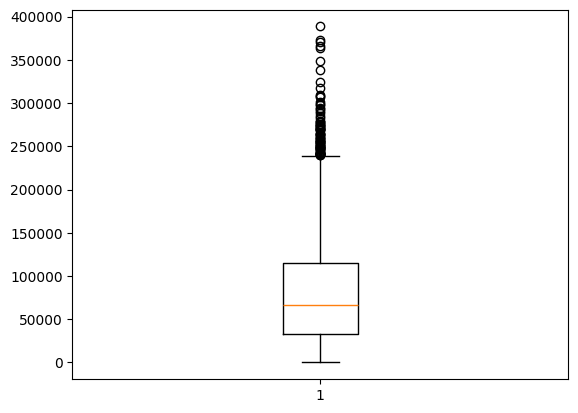

In [33]:
plt.boxplot(df.income)

In [34]:
df = df[df['income'] <225000]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f017ac821d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f017ac836d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f017ac81610>],
 'medians': [<matplotlib.lines.Line2D at 0x7f017ac4d010>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f017ac4dbd0>],
 'means': []}

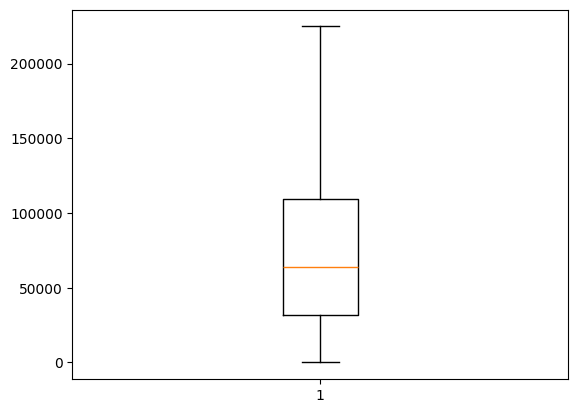

In [35]:
plt.boxplot(df.income)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f017adca050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f017adcb890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f017adc95d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f017ad1d110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f017ad1db50>],
 'means': []}

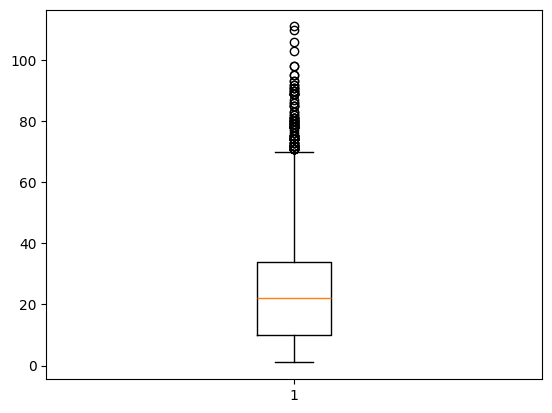

In [36]:
plt.boxplot(df.days_on_platform)

In [39]:
df = df[df['days_on_platform'] <68]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f017aeddc90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f017aed5990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f017af89950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f017aed7ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f017aed6bd0>],
 'means': []}

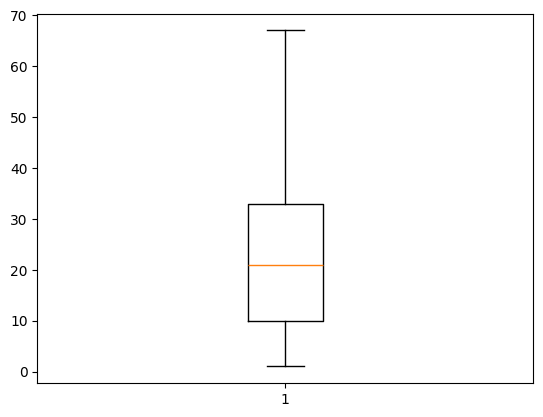

In [40]:
plt.boxplot(df.days_on_platform)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f017b144a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f017b145cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f017b144190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f017b147150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f017b147a10>],
 'means': []}

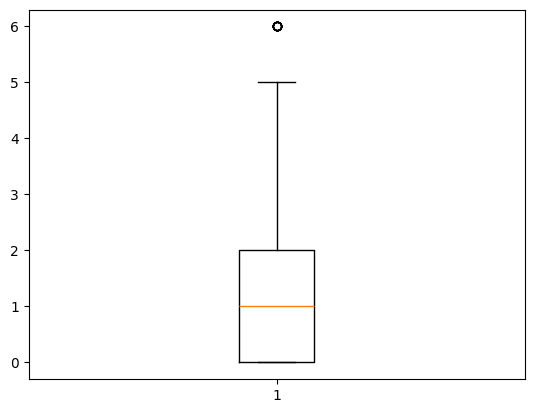

In [41]:
plt.boxplot(df.purchases)

In [42]:
df = df[df['purchases'] <6]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f017b0b6750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f017b0b6b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f017b0b4550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f017b0dcb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f017b0df350>],
 'means': []}

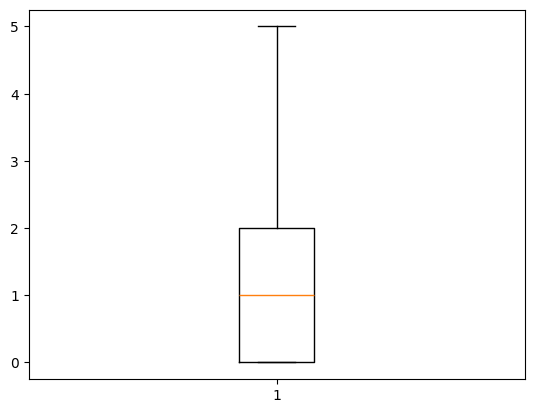

In [43]:
plt.boxplot(df.purchases)

##Simplify dataset

In [44]:
gender_le = LabelEncoder()
df['gender'] = gender_le.fit_transform(df['gender'])

<ipython-input-44-d51acb67b91e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = gender_le.fit_transform(df['gender'])


In [45]:
city_le = LabelEncoder()
df['city'] = city_le.fit_transform(df['city'])

<ipython-input-45-17a03fa0fa29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = city_le.fit_transform(df['city'])


In [46]:
df

,gender,income,days_on_platform,city,purchases
0,1,126895,14.0,3,0
1,1,161474,14.0,4,0
2,1,104723,34.0,0,1
3,1,43791,28.0,0,2
4,0,132181,26.0,0,2
...,...,...,...,...,...
4995,0,212261,28.0,3,1
4996,1,70228,12.0,3,0
4997,1,64995,14.0,2,0
4998,1,56144,4.0,2,2


##Scaling Data

In [47]:
scaler = StandardScaler()

In [48]:
df_scaled = scaler.fit_transform(df)

In [49]:
df_scaled

array([[ 0.98198805,  0.97796895, -0.57160137,  0.70043524, -0.93949199],
       [ 0.98198805,  1.62507365, -0.57160137,  1.40759537, -0.93949199],
       [ 0.98198805,  0.56304645,  0.70472472, -1.42104516, -0.07675648],
       ...,
       [ 0.98198805, -0.18041564, -0.57160137, -0.0067249 , -0.93949199],
       [ 0.98198805, -0.34605154, -1.20976441, -0.0067249 ,  0.78597903],
       [-1.01834233,  0.68008259,  0.3856432 , -1.42104516, -0.93949199]])

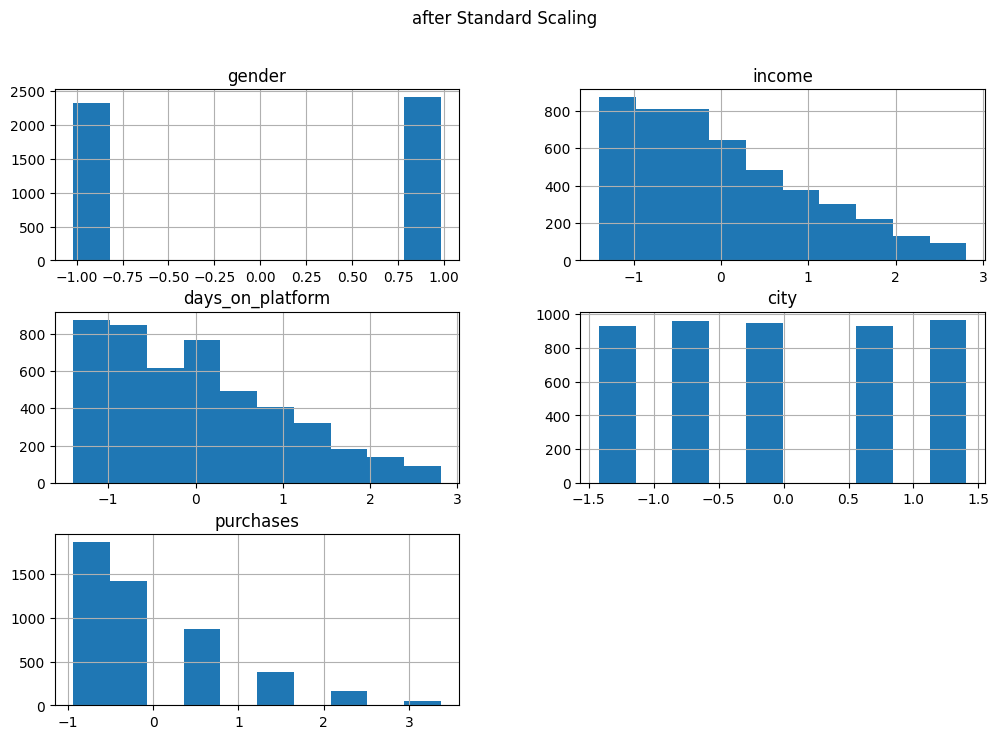

In [53]:
# Convert the NumPy array back to a Pandas DataFrame for plotting
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Now you can use the Pandas plotting functionality
df_scaled.hist(figsize=(12, 8))  # Changed to 'hist' for DataFrame

plt.suptitle("after Standard Scaling")
plt.show()